# UCG2SC12, September 2025
## Homework Assignment 3: Classes and objects, inheritance, interfaces, and abstract methods

Classes define objects with common data (attributes) and functionality (methods). 

The accompanying file ```vector.ipynb``` gives an example of a class Vector with attribute ```_array```, derived classes ```Matrix``` and ```Velocity```, and the interface ```Visual``` with abstract method ```visualize```.

For homework, implement something similar for
- Define a **base class ```Rectancle```** with attributes ```_side_a``` and ```_side_b``` and property ```area``` (i.e., use the ```@property``` descriptor)
- Implement the operator == (comparing sides).
- Implement the operator > (comparing area) so that rectangles can be sorted.
- Implement __str__ and __repr__
- Rectangles can be added if ```_side_a``` is equal or—--if ```side_a``` is not equal---they can still be added if ```side_b``` is equal.
- Rectangles can be subtracted if ```_side_a``` is equal or—--if ```side_a``` is not equal---they can still be subtracted if ```side_b``` is equal. But they can only be subtracted if the result is positive. There are no negative rectangles.
- If addition or subtraction are called when this is not possible, raise an Exception.
<br><br>
- Define a **derived class ```Square```**. Initializing a square should raise an error if two arguments are given and the sides are not equal. 
- Show that most of the functionality of Rectangle still works, in particular area and _str__.
- Adding squares must be possible. The result should have the type ```Rectangle```, not ```Square```. 
- While it doesn't make sense to modify a rectangle by setting the property ```area``` to a new value, it makes a lot of sense for a square, since by defining the area, the length of the sides is uniquely defined. Please implement ```@area.setter``` such that when the area of a square is set, like ```my_square.area = 25```, what is actually modified is the length of the two sides.
<br><br>
- Create an **Interface ```Visual```** with an abstract method visualize.
- ```Square``` should implement ```Visual```. Calling ```visualize``` should plot a square of correct size. Ask generative AI how to plot a square of size n*n on graphing paper.





In [ ]:
# your code

In [19]:
from math import sqrt
import matplotlib.pyplot as plt
from abc import ABCMeta, abstractmethod

In [47]:
class Visual(metaclass=ABCMeta):
    """Abstract base class for visualizable objects."""
    @classmethod
    def __subclasshook__(cls, subclass):
        """Check if a subclass implements the `visualize` method."""
        return hasattr(subclass, 'visualize') and callable(subclass.visualize)

    @abstractmethod
    def visualize(self):
        """
        Render a visual representation of the object.
        Must be implemented by subclasses.
        """
        raise NotImplementedError

In [42]:
class Rectangle(Visual):
    """A rectangle defined by two side lengths."""
    def __init__(self, side_a, side_b):
        """
        Initialize a rectangle.
        :param side_a: Length of horizontal side.
        :param side_b: Length of vertical side.
        """
        self._side_a = side_a
        self._side_b = side_b

    @property
    def area(self):
        """Return the area of the rectangle"""
        return self._side_a * self._side_b

    def visualize(self, color='red', **kwargs):
        """
        Plots the rectangle on an equal aspect matplotlib figure
        :param color: Color of the plotted lines 
        :param kwargs: kwargs for the ax.plot() function
        :return: None
        """
        fig, ax = plt.subplots()
        # Floor
        ax.plot([0, self._side_a], [0, 0], c=color, **kwargs)
        # Left wall
        ax.plot([0, 0], [0, self._side_b], c=color, **kwargs)
        # Right wall
        ax.plot([self._side_a, self._side_a], [0, self._side_b], 
                 c=color, **kwargs)
        # Ceiling
        ax.plot([0, self._side_a], [self._side_b, self._side_b], 
                 c=color, **kwargs)
        ax.set_aspect('equal')
        ax.set_xlim([-1, self._side_a+1])
        ax.set_ylim([-1, self._side_b+1])
        ax.grid(alpha=0.7)
        
        plt.show()

    def __eq__(self, other):
        """Check if two rectangles are equal (sides may be swapped)."""
        if (self._side_a == other._side_a
                and
                self._side_b == other._side_b):
            return True
        if (self._side_a == other._side_b
                and
                self._side_b == other._side_a):
            return True
        return False

    def __ne__(self, other):
        return not self.__eq__(other)

    def __gt__(self, other):
        """Check if this rectangle's area is less than another's."""
        if self.area > other.area:
            return True
        return False

    def __lt__(self, other):
        if self.area < other.area:
            return True
        return False

    def __str__(self):
        return f"Rectangle(side_a={self._side_a}, side_b={self._side_b})"

    def __repr__(self):
        return f"Rectangle({self._side_a}, {self._side_b})"

    def __add__(self, other):
        """
        Combine two rectangles along a matching side.
        If one dimension matches, extend the other dimension by addition.

        :param other: (Rectangle) The rectangle to add. 
        
        :return Rectangle: The combined rectangle.
         
        :raise ValueError: If the combined dimension is non-positive.
        :raise NotImplementedError: If no sides match.
        """
        if abs(self._side_a) == abs(other._side_a):
            combined_length = self._side_b + other._side_b
            if combined_length <= 0:
                raise ValueError("Rectangle cannot have negative or zero values")
            return Rectangle(self._side_a, combined_length)

        if abs(self._side_b) == abs(other._side_b):
            combined_length = self._side_a + other._side_a
            if combined_length <= 0:
                raise ValueError("Rectangle cannot have negative or zero values")
            return Rectangle(self._side_b, combined_length)

        raise NotImplementedError(
            "Adding/Subtracting rectangles with no shared side lengths not implemented"
        )

    def __sub__(self, other):
        """
        Subtract another rectangle by inverting its side lengths and adding.
        :param other: (Rectangle) The rectangle to subtract
        :return: The resulting rectangle
        """
        other = Rectangle(-other._side_a, -other._side_b)
        return self.__add__(other)

In [43]:
class Square(Rectangle):
    """A special case of a rectangle with equal side lengths."""
    def __init__(self, side_length):
        super().__init__(side_length, side_length)

    def __str__(self):
        return f"Square(side_lengths={self._side_a}, area={self.area})"

    def __repr__(self):
        return f"Square({self._side_a})"

    def __sub__(self, other):
        raise NotImplementedError("Cannot subtract squares")

    @property
    def area(self):
        return self._side_a ** 2

    @area.setter
    def area(self, _area):
        """
        Set the area of the square by adjusting side lengths.
        :param _area: Desired area of the square
        :return: same Square object (self) with new side lengths
        """
        self._side_a = sqrt(_area)
        self._side_b = sqrt(_area)

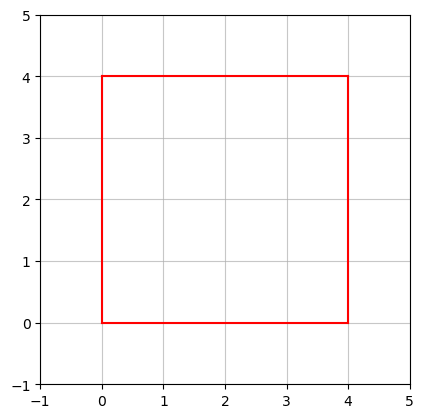

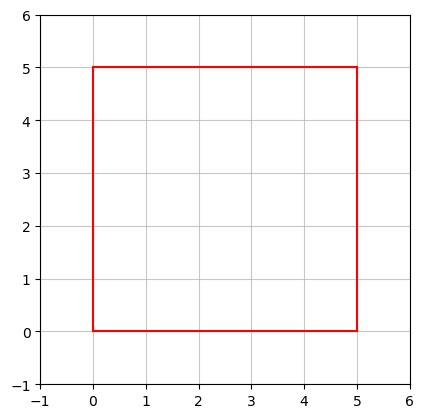

In [46]:
r1 = Square(4)
r1.visualize()
r1.area = 25
r1.visualize()